In [9]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from thefuzz import fuzz
from thefuzz import process

In [73]:
df = pd.read_csv('DataScientists.csv')

In [74]:
df

name        country  \
0             aaron elmore  united states   
1      abdalghani abujabal        germany   
2             abdul quamar  united states   
3        abdulhakim qahtan    netherlands   
4     abhijnan chakraborty        germany   
...                    ...            ...   
1215          zixian huang          china   
1216            zoi kaoudi          qatar   
1217            zoi kaoudi        germany   
1218          zsolt istvan        germany   
1219             zuohui fu  united states   

                                    institution  \
0                         university of chicago   
1                                  amazon alexa   
2                          ibm research almaden   
3                            utrecht university   
4     max planck institute for software systems   
...                                         ...   
1215                         nanjing university   
1216         qatar computing research institute   
1217                                  tu berlin   
1218                               tu darmstadt   
1219                         rutgers university   

                                                   dblp  expertise  
0          https://dblp.org/pers/e/Elmore:Aaron_J=.html        NaN  
1      https://dblp.org/pers/a/Abujabal:Abdalghani.html        NaN  
2             https://dblp.org/pers/q/Quamar:Abdul.html        NaN  
3                    https://dblp.org/pid/121/4198.html        NaN  
4     https://dblp.org/pers/c/Chakraborty:Abhijnan.html        NaN  
...                                                 ...        ...  
1215   https://dblp.uni-trier.de/pers/hd/h/Huang:Zixian        NaN  
1216            https://dblp.org/pers/k/Kaoudi:Zoi.html        NaN  
1217            https://dblp.org/pers/k/Kaoudi:Zoi.html        NaN  
1218                 https://dblp.org/pid/50/10703.html        NaN  
1219             https://dblp.org/pers/f/Fu:Zuohui.html        NaN  

[1220 rows x 5 columns]

In [4]:
# Drop duplicates from the 'dblp' column

df = df.drop_duplicates(subset='dblp')

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df

name        country  \
0             aaron elmore  united states   
1      abdalghani abujabal        germany   
2             abdul quamar  united states   
3        abdulhakim qahtan    netherlands   
4     abhijnan chakraborty        germany   
...                    ...            ...   
1074      ziawasch abedjan        germany   
1075          zixian huang          china   
1076            zoi kaoudi          qatar   
1077          zsolt istvan        germany   
1078             zuohui fu  united states   

                                    institution  \
0                         university of chicago   
1                                  amazon alexa   
2                          ibm research almaden   
3                            utrecht university   
4     max planck institute for software systems   
...                                         ...   
1074               leibniz universitat hannover   
1075                         nanjing university   
1076         qatar computing research institute   
1077                               tu darmstadt   
1078                         rutgers university   

                                                   dblp  expertise  
0          https://dblp.org/pers/e/Elmore:Aaron_J=.html        NaN  
1      https://dblp.org/pers/a/Abujabal:Abdalghani.html        NaN  
2             https://dblp.org/pers/q/Quamar:Abdul.html        NaN  
3                    https://dblp.org/pid/121/4198.html        NaN  
4     https://dblp.org/pers/c/Chakraborty:Abhijnan.html        NaN  
...                                                 ...        ...  
1074         https://dblp.uni-trier.de/pid/38/8707.html        NaN  
1075   https://dblp.uni-trier.de/pers/hd/h/Huang:Zixian        NaN  
1076            https://dblp.org/pers/k/Kaoudi:Zoi.html        NaN  
1077                 https://dblp.org/pid/50/10703.html        NaN  
1078             https://dblp.org/pers/f/Fu:Zuohui.html        NaN  

[1079 rows x 5 columns]

In [7]:
# For the first link in the dblp column and get the co-authors using beautiful soup

# Do the same for the entire df and merge the co-authors back to the df

co_authors = []

for url in df['dblp']:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    tag = soup.find_all('span', itemprop='author')
    authors = []
    for t in tag:
        authors.append(t.find('span', itemprop='name').text)
    co_authors.append(authors)

df['co_authors'] = co_authors










KeyboardInterrupt: 

In [2]:
import networkx as nx
import json
import pickle as pkl
networkList = json.load(open('network.json'))

In [3]:
networkList[2]

{'name': 'abdul quamar',
 'country': 'united states',
 'institution': 'ibm research almaden',
 'dblp': 'https://dblp.org/pers/q/Quamar:Abdul.html',
 'expertise': nan,
 'publish-info': [{'co-authors': ['Georgia Koutrika',
    'Jun Yang',
    'Manos Athanassoulis',
    'Kostas Stefanidis',
    'Ju Fan',
    'Abdul Quamar',
    'Yuanyan Tian',
    'Alekh Jindal',
    'Carsten Binnig',
    'Jennie Rogers',
    'Senjuti Basu Roy',
    'Steven Euijong Whang',
    'Matthias Boehm',
    'Aaron J. Elmore',
    'Vasilis Efthymiou',
    'Xiao Hu',
    'Xiaofang Zhou',
    'Alan D. Fekete'],
   'publish-date': ['2023']},
  {'co-authors': ['Chuan Lei',
    'Abdul Quamar',
    'Vasilis Efthymiou',
    'Fatma Özcan',
    'Rana Alotaibi'],
   'publish-date': ['2023']},
  {'co-authors': ['Abdul Quamar',
    'Vasilis Efthymiou',
    'Chuan Lei',
    'Fatma Özcan'],
   'publish-date': ['2022']},
  {'co-authors': ['Abdul Quamar',
    'Vasilis Efthymiou',
    'Chuan Lei',
    'Fatma Özcan'],
   'publish-da

In [77]:
df

name        country  \
0             aaron elmore  united states   
1      abdalghani abujabal        germany   
2             abdul quamar  united states   
3        abdulhakim qahtan    netherlands   
4     abhijnan chakraborty        germany   
...                    ...            ...   
1215          zixian huang          china   
1216            zoi kaoudi          qatar   
1217            zoi kaoudi        germany   
1218          zsolt istvan        germany   
1219             zuohui fu  united states   

                                    institution  \
0                         university of chicago   
1                                  amazon alexa   
2                          ibm research almaden   
3                            utrecht university   
4     max planck institute for software systems   
...                                         ...   
1215                         nanjing university   
1216         qatar computing research institute   
1217                                  tu berlin   
1218                               tu darmstadt   
1219                         rutgers university   

                                                   dblp  expertise  
0          https://dblp.org/pers/e/Elmore:Aaron_J=.html        NaN  
1      https://dblp.org/pers/a/Abujabal:Abdalghani.html        NaN  
2             https://dblp.org/pers/q/Quamar:Abdul.html        NaN  
3                    https://dblp.org/pid/121/4198.html        NaN  
4     https://dblp.org/pers/c/Chakraborty:Abhijnan.html        NaN  
...                                                 ...        ...  
1215   https://dblp.uni-trier.de/pers/hd/h/Huang:Zixian        NaN  
1216            https://dblp.org/pers/k/Kaoudi:Zoi.html        NaN  
1217            https://dblp.org/pers/k/Kaoudi:Zoi.html        NaN  
1218                 https://dblp.org/pid/50/10703.html        NaN  
1219             https://dblp.org/pers/f/Fu:Zuohui.html        NaN  

[1220 rows x 5 columns]

In [78]:
df.drop_duplicates(subset='dblp', inplace=True)

In [79]:
# Make an array with the names in the networkList

names = []

for i in range(len(networkList)):
    names.append(networkList[i]['name'])

# Put the names in the df

df['dblp_name'] = names

df

name        country  \
0             aaron elmore  united states   
1      abdalghani abujabal        germany   
2             abdul quamar  united states   
3        abdulhakim qahtan    netherlands   
4     abhijnan chakraborty        germany   
...                    ...            ...   
1214      ziawasch abedjan        germany   
1215          zixian huang          china   
1216            zoi kaoudi          qatar   
1218          zsolt istvan        germany   
1219             zuohui fu  united states   

                                    institution  \
0                         university of chicago   
1                                  amazon alexa   
2                          ibm research almaden   
3                            utrecht university   
4     max planck institute for software systems   
...                                         ...   
1214               leibniz universitat hannover   
1215                         nanjing university   
1216         qatar computing research institute   
1218                               tu darmstadt   
1219                         rutgers university   

                                                   dblp  expertise  \
0          https://dblp.org/pers/e/Elmore:Aaron_J=.html        NaN   
1      https://dblp.org/pers/a/Abujabal:Abdalghani.html        NaN   
2             https://dblp.org/pers/q/Quamar:Abdul.html        NaN   
3                    https://dblp.org/pid/121/4198.html        NaN   
4     https://dblp.org/pers/c/Chakraborty:Abhijnan.html        NaN   
...                                                 ...        ...   
1214         https://dblp.uni-trier.de/pid/38/8707.html        NaN   
1215   https://dblp.uni-trier.de/pers/hd/h/Huang:Zixian        NaN   
1216            https://dblp.org/pers/k/Kaoudi:Zoi.html        NaN   
1218                 https://dblp.org/pid/50/10703.html        NaN   
1219             https://dblp.org/pers/f/Fu:Zuohui.html        NaN   

                 dblp_name  
0             aaron elmore  
1      abdalghani abujabal  
2             abdul quamar  
3        abdulhakim qahtan  
4     abhijnan chakraborty  
...                    ...  
1214      ziawasch abedjan  
1215          zixian huang  
1216            zoi kaoudi  
1218          zsolt istvan  
1219             zuohui fu  

[1079 rows x 6 columns]

In [4]:
print(networkList[0].keys())

dict_keys(['name', 'country', 'institution', 'dblp', 'expertise', 'publish-info'])


In [5]:
networkList[0]['name']

'aaron elmore'

In [6]:
print(networkList[0]['publish-info'][1]['co-authors'])

['Raul Castro Fernandez', 'Aaron J. Elmore', 'Michael J. Franklin', 'Sanjay Krishnan', 'Chenhao Tan']


In [7]:
print(len(networkList))

1079


In [11]:
count = 1
dict_coauthors = {}
for publicationList in networkList[0]['publish-info']:
    for coauthor in publicationList['co-authors']:
        if coauthor not in dict_coauthors:
            dict_coauthors[coauthor] = count
            count += 1

dict_coauthors

{'John Paparrizos': 1,
 'Kaize Wu': 2,
 'Aaron J. Elmore': 3,
 'Christos Faloutsos': 4,
 'Michael J. Franklin': 5,
 'Raul Castro Fernandez': 6,
 'Sanjay Krishnan': 7,
 'Chenhao Tan': 8,
 'Georgia Koutrika': 9,
 'Jun Yang': 10,
 'Manos Athanassoulis': 11,
 'Kostas Stefanidis': 12,
 'Ju Fan': 13,
 'Abdul Quamar': 14,
 'Yuanyan Tian': 15,
 'Alekh Jindal': 16,
 'Carsten Binnig': 17,
 'Jennie Rogers': 18,
 'Senjuti Basu Roy': 19,
 'Steven Euijong Whang': 20,
 'Matthias Boehm': 21,
 'Vasilis Efthymiou': 22,
 'Xiao Hu': 23,
 'Xiaofang Zhou': 24,
 'Alan D. Fekete': 25,
 'Rui Liu': 26,
 'Siyuan Xia': 27,
 'Zhiru Zhu': 28,
 'Chris Zhu': 29,
 'Jinjin Zhao': 30,
 'Kyle Chard': 31,
 'Ian T. Foster': 32,
 'Paul Boniol': 33,
 'Themis Palpanas': 34,
 'Ruey Tsay': 35,
 'Yuhao Kang': 36,
 'Ruey S. Tsay': 37,
 'Mohammed Suhail Rehman': 38,
 'Ikraduya Edian': 39,
 'Chunwei Liu': 40,
 'Will Brackenbury': 41,
 'Blase Ur': 42,
 'Hao Jiang': 43,
 'Silu Huang': 44,
 'Bruno Barbarioli': 45,
 'Johnny Hwang': 46,

In [12]:
len(dict_coauthors.keys())

147

In [113]:
# Get the network properties of the collaboration network

G = nx.Graph()


for network in networkList:
    name = network['name']
    for publicationList in network['publish-info']:
        for authorList in publicationList['co-authors']:
            if(fuzz.ratio(str.lower(name), str.lower(authorList))<=90):
                G.add_edge(str.lower(name), str.lower(authorList))
            

In [114]:
df['dblp_name'][903]

'sanjay krishnan'

In [110]:
G_RESTRICTED = nx.Graph()

for network in networkList:
    name = network['name']
    for publicationList in network['publish-info']:
        for authorList in publicationList['co-authors']:
            if((df['dblp_name'].eq(str.lower(authorList))).any()):
                if(fuzz.ratio(str.lower(name), str.lower(authorList))<=90):
                    G_RESTRICTED.add_edge(name, authorList)

In [111]:
G_RESTRICTED.number_of_nodes()

1886

In [112]:
G_RESTRICTED.degree()

DegreeView({'aaron elmore': 37, 'John Paparrizos': 4, 'Raul Castro Fernandez': 24, 'Sanjay Krishnan': 26, 'Georgia Koutrika': 55, 'Jun Yang': 47, 'Manos Athanassoulis': 27, 'Ju Fan': 36, 'Abdul Quamar': 27, 'Carsten Binnig': 47, 'Jennie Rogers': 20, 'Matthias Boehm': 26, 'Vasilis Efthymiou': 39, 'Xiaofang Zhou': 98, 'Zechao Shang': 16, 'Dixin Tang': 6, 'Mainack Mondal': 6, 'Jeffrey Xu Yu': 80, 'Samuel Madden': 91, 'Jeremy Kepner': 18, 'Amol Deshpande': 35, 'Rebecca Taft': 8, 'Andrew Pavlo': 49, 'Brandon Haynes': 21, 'Nesime Tatbul': 44, 'Mike Stonebraker': 17, 'Magdalena Balazinska': 64, 'Bill Howe': 36, 'Tim Kraska': 95, 'Manasi Vartak': 20, 'Eugene Wu': 32, 'Amr El Abbadi': 53, 'Essam Mansour': 23, 'Carlo Curino': 47, 'Sudipto Das': 14, 'Xifeng Yan': 25, 'Beng Chin Ooi': 99, 'Yingyi Bu': 21, 'abdalghani abujabal': 6, 'Mohamed Soliman': 1, 'Philipp Christmann': 3, 'Rishiraj Saha Roy': 9, 'Gerhard Weikum': 74, 'Martin Theobald': 23, 'Mirek Riedewald': 18, 'abdul quamar': 24, 'Chuan Lei

In [117]:
# Get the subgraph where the nodes are only those that are in the df

G_RESTRICTED = G.subgraph(df['dblp_name'])

# Get the degree of the nodes in the subgraph

G_RESTRICTED.degree()

DegreeView({'mohammed eunus ali': 9, 'maneesh singh': 1, 'chanyoung park': 5, 'chaokun wang': 15, 'michael cafarella': 25, 'nur haldar': 8, 'sowmya vajjala': 0, 'christoph koch': 34, 'marco brambilla': 9, 'srijan kumar': 13, 'ilia petrov': 6, 'hongning wang': 8, 'ben kao': 20, 'sujatha das gollapalli': 1, 'arlei silva': 2, 'kaiyu feng': 12, 'melanie herschel': 22, 'ion stoica': 32, 'george kollios': 16, 'chengkai li': 19, 'eugene wu': 34, 'sang won lee': 4, 'shirish tatikonda': 4, 'xin huang': 33, 'ken barker': 2, 'vassilis christophides': 23, 'chunbin lin': 13, 'mohamed sharaf': 31, 'chen qu': 4, 'matteo paganelli': 2, 'ioana manolescu': 56, 'natacha crooks': 9, 'cagatay demiralp': 12, 'muhammad aamir cheema': 26, 'george fletcher': 20, 'yin yang': 20, 'sudeepa roy': 33, 'sudipto das': 14, 'dinesh garg': 5, 'vincent oria': 9, 'peter alvaro': 3, 'shivali agarwal': 1, 'konstantinos chatzikokolakis': 0, 'wagner meira jr.': 7, 'alexandra meliou': 41, 'luca soldaini': 1, 'anthony tung': 51

In [118]:
G.number_of_nodes()

79210

In [119]:
G_RESTRICTED.number_of_nodes()

1064

In [67]:
# Get the number of edges
G.size()

162964

In [120]:
G_RESTRICTED.size()

9085

In [68]:
# Density of the graph
nx.density(G)

5.077951829735793e-05

In [121]:
nx.density(G_RESTRICTED)

0.016064974288967953

In [72]:
for network in networkList:
    if(network['name'] == 'Galen Harrison'):
        print(network)

In [69]:
# Get Authors with degree 1
degree = G.degree()
degree = dict(degree)
degree_1 = [k for k, v in degree.items() if v == 1]

degree_1

['Mohammed Suhail Rehman',
 'Galen Harrison',
 'Andrew M. McNutt',
 'McKade Umbenhower',
 'Abhishek Nigam',
 'Luann Jung',
 'Yuanwei Fang',
 'Chen Zou',
 'SiLi Hui',
 'Mohamed Soliman',
 'Jose Garrido Ramas',
 'Giorgio Pessot',
 'Claudio Delli Bovi',
 'Sungho Ryu',
 'Turan Gojayev',
 'Fabian Triefenbach',
 'Yannick Versley',
 'Judith Gaspers',
 'Suojin Wang',
 'Basma Alharbi',
 'Raymond J. Carroll',
 'Junaid Ali',
 'Mahmoudreza Babaei',
 'Archit Bansal',
 'Kunal Banerjee',
 'Daman Deep Singh',
 'Elissa M. Redmiles',
 'Nuno Mota',
 'Negar Mohammadi',
 'Hoda Heidari',
 'Ana-Andreea Stoica',
 'Linus W. Dietz',
 'Filipe Nunes Ribeiro',
 'Vishnu Navda',
 'Koushik Mandal',
 'Arindam Sen',
 'Siuli Roy',
 'Suvadip Batabyal',
 'Mani Mehra',
 'Ari Kapelyan',
 'Davide Venturelli',
 'Anh Pham Thi Minh',
 'Soumya Snigdha Kundu',
 'Shweta Kumari',
 'Vaibhav Mehandiratta',
 'Shalini Saha',
 'Amares Chattopadhyay',
 'Peter L. McMahon',
 'Anatoly A. Alikhanov',
 'Mukesh Kumar Pal',
 'Arvind Kumar',
 'A

## Average Degree is approx 4 and ln(N) is 11.29 

Therefore the graph is in the supercritical regime. We won't have a connected graph but there will be a largest component

In [17]:
# Average degree of the graph
np.mean(list(dict(G.degree()).values()))

4.062689029419851

In [122]:
np.mean(list(dict(G_RESTRICTED.degree()).values())) 

17.077067669172934

In [18]:
np.log(G.number_of_nodes())

11.289956898345304

In [123]:
np.log(G_RESTRICTED.number_of_nodes())

6.96979066990159

## We use the largest component to get shortest path and clustering coefficient etc

In [19]:
largest_cc = max(nx.connected_components(G), key=len)

In [20]:
largest_cc

{'Behrad Khorram Nazari',
 'Michael Mertig',
 'Yuyan Li',
 'Milos Todic',
 'Carolyn Chen',
 'Guy A. Story',
 'Qinshen Wang',
 'Si Liu',
 'Mohamed Khedr',
 'Samuel Dorevitch',
 'Favyen Bastani',
 'Jeff Anderson',
 'Bairen Chen',
 'Ashwini Patil',
 'Michel Hassenforder',
 'Rusheng Cai',
 'Chih-Ya Shen',
 'Mohammad Mahdi Khosravi',
 'Pingfu Fu',
 'Taige Zhao',
 'Uwe Leo Korn',
 'Jin Cheng',
 'Chelsea N. King',
 'Pin-Jou Lu',
 'Sasi Bhusan',
 'Andy Brass',
 'Xinjian Qi',
 'Zhiyu Liu',
 'V. Viswanathan',
 'Praveen Bysani',
 'Maurizio Panti',
 'Youzeng Hao',
 'Aurghya Maiti',
 'Bicheng Luo',
 'Markus Kusano',
 'Amarnag Subramanya',
 'Ana Valéria Farias Barroso',
 'Wenkui Ding',
 'Umut Sulubacak',
 'Noah Kelleher',
 'Alejandro A. Vaisman',
 'Pengfei He',
 'Nicolas Spyratos',
 'Piyaphol Phoungphol',
 'Günther Hölbling',
 'Marco Richeldi',
 'Laila Abdelhafeez',
 'Alex Jacoby',
 'Friðrik Heiðar Ásmundsson',
 'Zeki Mustafa Dogan',
 'Manaal Faruqui',
 'Michael Grabchak',
 'Junhai Zhu',
 'Emily The

In [21]:
GC = G.subgraph(largest_cc)

In [124]:
nx.is_connected(G_RESTRICTED)

False

In [126]:
largest_restricted_cc = max(nx.connected_components(G_RESTRICTED), key=len)

GC_RESTRICTED = G_RESTRICTED.subgraph(largest_restricted_cc)

In [127]:
nx.diameter(GC_RESTRICTED)

8

In [23]:
# Diameter of the graph
nx.approximation.diameter(GC)

8

In [128]:
# todo: run later
nx.average_shortest_path_length(GC_RESTRICTED)

KeyboardInterrupt: 

In [25]:
# Connectedness of the graph
nx.is_connected(GC)

True

In [66]:
nx.write_gexf(G, 'collaboration_network.gexf')

In [27]:
nx.average_neighbor_degree(G)

{'aaron elmore': 19.226027397260275,
 'John Paparrizos': 189.75,
 'Kaize Wu': 207.33333333333334,
 'Christos Faloutsos': 289.8333333333333,
 'Michael J. Franklin': 281.7536231884058,
 'Raul Castro Fernandez': 231.08333333333334,
 'Sanjay Krishnan': 246.19230769230768,
 'Chenhao Tan': 268.0,
 'Georgia Koutrika': 206.6727272727273,
 'Jun Yang': 312.4255319148936,
 'Manos Athanassoulis': 159.22222222222223,
 'Kostas Stefanidis': 181.33333333333334,
 'Ju Fan': 229.55555555555554,
 'Abdul Quamar': 225.4814814814815,
 'Yuanyan Tian': 185.0,
 'Alekh Jindal': 200.28333333333333,
 'Carsten Binnig': 175.74468085106383,
 'Jennie Rogers': 223.45,
 'Senjuti Basu Roy': 202.02857142857144,
 'Steven Euijong Whang': 214.62962962962962,
 'Matthias Boehm': 231.0,
 'Vasilis Efthymiou': 236.48717948717947,
 'Xiao Hu': 237.45454545454547,
 'Xiaofang Zhou': 324.11224489795916,
 'Alan D. Fekete': 239.82142857142858,
 'Rui Liu': 265.76666666666665,
 'Siyuan Xia': 180.4,
 'Zhiru Zhu': 188.0,
 'Chris Zhu': 210.7

In [129]:
nx.average_neighbor_degree(G_RESTRICTED)

{'mohammed eunus ali': 36.44444444444444,
 'maneesh singh': 3.0,
 'chanyoung park': 25.8,
 'chaokun wang': 47.93333333333333,
 'michael cafarella': 37.48,
 'nur haldar': 38.375,
 'sowmya vajjala': 0.0,
 'christoph koch': 31.264705882352942,
 'marco brambilla': 28.666666666666668,
 'srijan kumar': 15.23076923076923,
 'ilia petrov': 24.833333333333332,
 'hongning wang': 24.625,
 'ben kao': 34.75,
 'sujatha das gollapalli': 4.0,
 'arlei silva': 10.0,
 'kaiyu feng': 42.416666666666664,
 'melanie herschel': 44.13636363636363,
 'ion stoica': 32.84375,
 'george kollios': 37.25,
 'chengkai li': 32.8421052631579,
 'eugene wu': 43.205882352941174,
 'sang won lee': 32.75,
 'shirish tatikonda': 25.75,
 'xin huang': 35.09090909090909,
 'ken barker': 49.0,
 'vassilis christophides': 34.56521739130435,
 'chunbin lin': 48.15384615384615,
 'mohamed sharaf': 41.96774193548387,
 'chen qu': 14.75,
 'matteo paganelli': 34.0,
 'ioana manolescu': 35.392857142857146,
 'natacha crooks': 26.555555555555557,
 'c

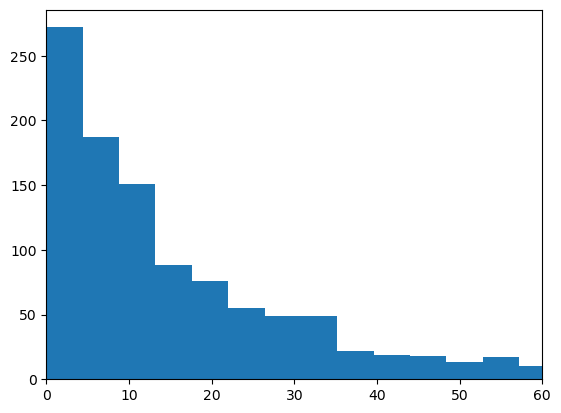

In [142]:
# Plot the degree distribution of the graph using 10 bins
import matplotlib.pyplot as plt
plt.hist(list(dict(G_RESTRICTED.degree()).values()), bins=30)
plt.xlim(0, 60)
plt.show()


## We can see from the trendline that the network is a Dissasortative network

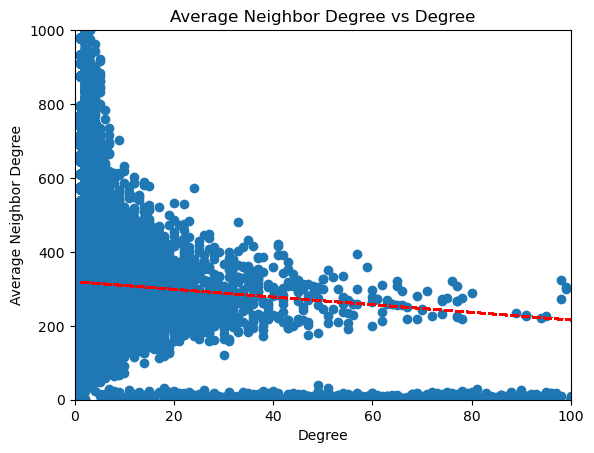

In [45]:
# Plot Average Neighbor Degree vs Degree
import matplotlib.pyplot as plt
degree = dict(G.degree())
avg_neigh_degree = nx.average_neighbor_degree(G)
x = []
y = []
for k in degree.keys():
    x.append(degree[k])
    y.append(avg_neigh_degree[k])
plt.scatter(x, y)
plt.xlim(0, 100)
plt.ylim(0, 1000)
# plot trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.title('Average Neighbor Degree vs Degree')
plt.show()

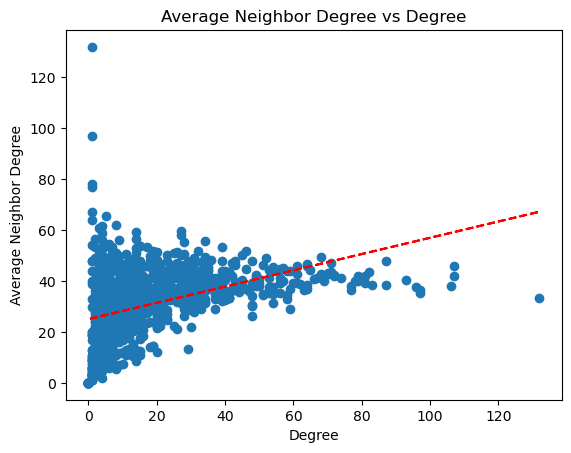

In [133]:
# Plot Average Neighbor Degree vs Degree
import matplotlib.pyplot as plt
degree = dict(G_RESTRICTED.degree())
avg_neigh_degree = nx.average_neighbor_degree(G_RESTRICTED)
x = []
y = []
for k in degree.keys():
    x.append(degree[k])
    y.append(avg_neigh_degree[k])
plt.scatter(x, y)
# plot trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.title('Average Neighbor Degree vs Degree')
plt.show()

In [31]:
print(degree)

{'aaron elmore': 146, 'John Paparrizos': 4, 'Kaize Wu': 3, 'Christos Faloutsos': 48, 'Michael J. Franklin': 69, 'Raul Castro Fernandez': 24, 'Sanjay Krishnan': 26, 'Chenhao Tan': 5, 'Georgia Koutrika': 55, 'Jun Yang': 47, 'Manos Athanassoulis': 27, 'Kostas Stefanidis': 27, 'Ju Fan': 36, 'Abdul Quamar': 27, 'Yuanyan Tian': 12, 'Alekh Jindal': 60, 'Carsten Binnig': 47, 'Jennie Rogers': 20, 'Senjuti Basu Roy': 35, 'Steven Euijong Whang': 27, 'Matthias Boehm': 26, 'Vasilis Efthymiou': 39, 'Xiao Hu': 22, 'Xiaofang Zhou': 98, 'Alan D. Fekete': 28, 'Rui Liu': 30, 'Siyuan Xia': 5, 'Zhiru Zhu': 5, 'Chris Zhu': 4, 'Jinjin Zhao': 6, 'Kyle Chard': 9, 'Ian T. Foster': 14, 'Paul Boniol': 3, 'Themis Palpanas': 43, 'Ruey Tsay': 3, 'Yuhao Kang': 3, 'Ruey S. Tsay': 3, 'Mohammed Suhail Rehman': 1, 'Ikraduya Edian': 4, 'Chunwei Liu': 12, 'Will Brackenbury': 4, 'Blase Ur': 4, 'Hao Jiang': 9, 'Silu Huang': 13, 'Bruno Barbarioli': 4, 'Johnny Hwang': 4, 'Nalin Ranjan': 3, 'Zechao Shang': 16, 'Cong Ding': 7, '

In [35]:
for k in degree.keys():
    print(k, degree[k], avg_neigh_degree[k])


aaron elmore 146 19.226027397260275
John Paparrizos 4 189.75
Kaize Wu 3 207.33333333333334
Christos Faloutsos 48 289.8333333333333
Michael J. Franklin 69 281.7536231884058
Raul Castro Fernandez 24 231.08333333333334
Sanjay Krishnan 26 246.19230769230768
Chenhao Tan 5 268.0
Georgia Koutrika 55 206.6727272727273
Jun Yang 47 312.4255319148936
Manos Athanassoulis 27 159.22222222222223
Kostas Stefanidis 27 181.33333333333334
Ju Fan 36 229.55555555555554
Abdul Quamar 27 225.4814814814815
Yuanyan Tian 12 185.0
Alekh Jindal 60 200.28333333333333
Carsten Binnig 47 175.74468085106383
Jennie Rogers 20 223.45
Senjuti Basu Roy 35 202.02857142857144
Steven Euijong Whang 27 214.62962962962962
Matthias Boehm 26 231.0
Vasilis Efthymiou 39 236.48717948717947
Xiao Hu 22 237.45454545454547
Xiaofang Zhou 98 324.11224489795916
Alan D. Fekete 28 239.82142857142858
Rui Liu 30 265.76666666666665
Siyuan Xia 5 180.4
Zhiru Zhu 5 188.0
Chris Zhu 4 210.75
Jinjin Zhao 6 422.8333333333333
Kyle Chard 9 225.22222222222

In [33]:
nx.average_neighbor_degree(G)

{'aaron elmore': 19.226027397260275,
 'John Paparrizos': 189.75,
 'Kaize Wu': 207.33333333333334,
 'Christos Faloutsos': 289.8333333333333,
 'Michael J. Franklin': 281.7536231884058,
 'Raul Castro Fernandez': 231.08333333333334,
 'Sanjay Krishnan': 246.19230769230768,
 'Chenhao Tan': 268.0,
 'Georgia Koutrika': 206.6727272727273,
 'Jun Yang': 312.4255319148936,
 'Manos Athanassoulis': 159.22222222222223,
 'Kostas Stefanidis': 181.33333333333334,
 'Ju Fan': 229.55555555555554,
 'Abdul Quamar': 225.4814814814815,
 'Yuanyan Tian': 185.0,
 'Alekh Jindal': 200.28333333333333,
 'Carsten Binnig': 175.74468085106383,
 'Jennie Rogers': 223.45,
 'Senjuti Basu Roy': 202.02857142857144,
 'Steven Euijong Whang': 214.62962962962962,
 'Matthias Boehm': 231.0,
 'Vasilis Efthymiou': 236.48717948717947,
 'Xiao Hu': 237.45454545454547,
 'Xiaofang Zhou': 324.11224489795916,
 'Alan D. Fekete': 239.82142857142858,
 'Rui Liu': 265.76666666666665,
 'Siyuan Xia': 180.4,
 'Zhiru Zhu': 188.0,
 'Chris Zhu': 210.7

In [63]:
# get the people with degree 1
degree_1 = [k for k in degree.keys() if degree[k] == 1]
degree_1

['Mohammed Suhail Rehman',
 'Galen Harrison',
 'Andrew M. McNutt',
 'McKade Umbenhower',
 'Abhishek Nigam',
 'Luann Jung',
 'Yuanwei Fang',
 'Chen Zou',
 'SiLi Hui',
 'Mohamed Soliman',
 'Jose Garrido Ramas',
 'Giorgio Pessot',
 'Claudio Delli Bovi',
 'Sungho Ryu',
 'Turan Gojayev',
 'Fabian Triefenbach',
 'Yannick Versley',
 'Judith Gaspers',
 'Suojin Wang',
 'Basma Alharbi',
 'Raymond J. Carroll',
 'Junaid Ali',
 'Mahmoudreza Babaei',
 'Archit Bansal',
 'Kunal Banerjee',
 'Daman Deep Singh',
 'Elissa M. Redmiles',
 'Nuno Mota',
 'Negar Mohammadi',
 'Hoda Heidari',
 'Ana-Andreea Stoica',
 'Linus W. Dietz',
 'Filipe Nunes Ribeiro',
 'Vishnu Navda',
 'Koushik Mandal',
 'Arindam Sen',
 'Siuli Roy',
 'Suvadip Batabyal',
 'Mani Mehra',
 'Ari Kapelyan',
 'Davide Venturelli',
 'Anh Pham Thi Minh',
 'Soumya Snigdha Kundu',
 'Shweta Kumari',
 'Vaibhav Mehandiratta',
 'Shalini Saha',
 'Amares Chattopadhyay',
 'Peter L. McMahon',
 'Anatoly A. Alikhanov',
 'Mukesh Kumar Pal',
 'Arvind Kumar',
 'A

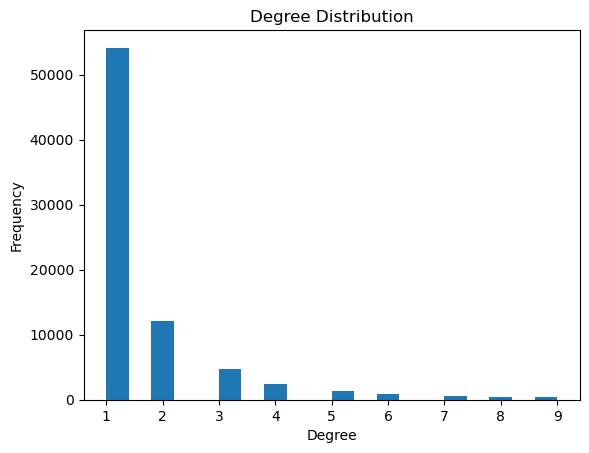

In [62]:
# Plot Degree Distribution but use 30 bins
degree = dict(G.degree())
degree_values = list(degree.values())
degree_values = [x for x in degree_values if x < 10]
plt.hist(degree_values, bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [64]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'aaron elmore': 0.0018247034856835765,
 'John Paparrizos': 4.9991876320097985e-05,
 'Kaize Wu': 3.749390724007349e-05,
 'Christos Faloutsos': 0.0005999025158411758,
 'Michael J. Franklin': 0.0008623598665216903,
 'Raul Castro Fernandez': 0.0002999512579205879,
 'Sanjay Krishnan': 0.0003249471960806369,
 'Chenhao Tan': 6.248984540012248e-05,
 'Georgia Koutrika': 0.0006873882994013473,
 'Jun Yang': 0.0005874045467611514,
 'Manos Athanassoulis': 0.0003374451651606614,
 'Kostas Stefanidis': 0.0003374451651606614,
 'Ju Fan': 0.00044992688688088185,
 'Abdul Quamar': 0.0003374451651606614,
 'Yuanyan Tian': 0.00014997562896029395,
 'Alekh Jindal': 0.0007498781448014698,
 'Carsten Binnig': 0.0005874045467611514,
 'Jennie Rogers': 0.00024995938160048993,
 'Senjuti Basu Roy': 0.00043742891780085735,
 'Steven Euijong Whang': 0.0003374451651606614,
 'Matthias Boehm': 0.0003249471960806369,
 'Vasilis Efthymiou': 0.0004874207941209554,
 'Xiao Hu': 0.0002749553197605389,
 'Xiaofang Zhou': 0.001224800

In [ ]:
# Make a random network with the same number of nodes and edges
G_rand = nx.gnm_random_graph(G.number_of_nodes(), G.size())

